In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [4]:
dataset = pd.read_csv('WestRoxbury.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5802 non-null   float64
 1   TAX           5802 non-null   int64  
 2   LOT SQFT      5802 non-null   int64  
 3   YR BUILT      5802 non-null   int64  
 4   GROSS AREA    5802 non-null   int64  
 5   LIVING AREA   5802 non-null   int64  
 6   FLOORS        5802 non-null   float64
 7   ROOMS         5802 non-null   int64  
 8   BEDROOMS      5802 non-null   int64  
 9   FULL BATH     5802 non-null   int64  
 10  HALF BATH     5802 non-null   int64  
 11  KITCHEN       5802 non-null   int64  
 12  FIREPLACE     5802 non-null   int64  
 13  REMODEL       5802 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


In [6]:
print("Total rows:", len(dataset.TAX))

Total rows: 5802


In [7]:
ds = dataset
print(ds.columns)

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')


In [8]:
#1 renaming column names
ds = ds.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE', 'LOT SQFT ': 'LOT_SQFT', 'YR BUILT': 'YR_BUILT', 'GROSS AREA ': 'GROSS_AREA', 'LIVING AREA': 'LIVING_AREA', 'FLOORS ': 'FLOORS', 'BEDROOMS ': 'BEDROOMS', 'FULL BATH': 'FULL_BATH', 'HALF BATH': 'HALF_BATH'})

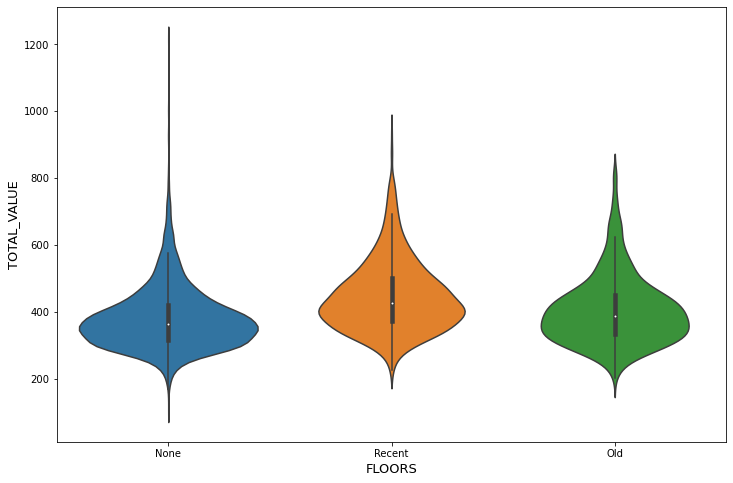

In [9]:
#2
#voilin plot to study the distribution of the data
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL', y='TOTAL_VALUE', data=ds)
plt.xlabel('FLOORS', fontsize=13)
plt.ylabel('TOTAL_VALUE', fontsize=13)
plt.show()

In [10]:
ds

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None


In [11]:
#3 check for missing/null values

ds['TOTAL_VALUE'].value_counts()


309.600    8
410.800    8
363.800    8
354.200    8
356.000    8
          ..
488.500    1
559.800    1
471.700    1
425.700    1
413.414    1
Name: TOTAL_VALUE, Length: 2748, dtype: int64

In [12]:
#checking for any inconsistency
ds['LOT_SQFT'].value_counts()


5000    336
6000    124
4000    101
5500    100
4500     41
       ... 
8709      1
4203      1
3485      1
3131      1
7406      1
Name: LOT_SQFT, Length: 3096, dtype: int64

In [13]:
#checking for any inconsistency
ds['GROSS_AREA'].value_counts()


2304    23
2160    22
2328    20
2520    19
2604    18
        ..
4319     1
3179     1
5180     1
4628     1
1998     1
Name: GROSS_AREA, Length: 2318, dtype: int64

In [14]:
#checking for any inconsistency
ds['FLOORS'].value_counts()


2.0    3415
1.0    1505
1.5     773
2.5     105
3.0       4
Name: FLOORS, dtype: int64

In [15]:
#checking for any inconsistency
ds['YR_BUILT'].value_counts()

1920    566
1950    478
1930    430
1960    356
1925    302
       ... 
1883      1
1976      1
0         1
1874      1
1800      1
Name: YR_BUILT, Length: 149, dtype: int64

In [16]:
#remove the year with 0 value
ds = ds[ds.YR_BUILT != 0]

In [17]:
ds['YR_BUILT'].value_counts()

1920    566
1950    478
1930    430
1960    356
1925    302
       ... 
1798      1
1883      1
1881      1
1874      1
1872      1
Name: YR_BUILT, Length: 148, dtype: int64

In [18]:
#checking for any inconsistency
ds['TAX'].value_counts()

4478    8
4455    8
5167    8
3894    8
4576    8
       ..
9475    1
6136    1
6145    1
7042    1
7095    1
Name: TAX, Length: 2734, dtype: int64

In [19]:
#checking for any inconsistency
ds['LIVING_AREA'].value_counts()

1306    80
1726    56
1075    56
1680    41
1536    39
        ..
4100     1
1381     1
1604     1
1374     1
1662     1
Name: LIVING_AREA, Length: 1712, dtype: int64

In [20]:
#checking for any inconsistency
ds['FLOORS'].value_counts()

2.0    3414
1.0    1505
1.5     773
2.5     105
3.0       4
Name: FLOORS, dtype: int64

In [21]:
#checking for any inconsistency
ds['ROOMS'].value_counts()

7     1769
6     1669
8      935
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64

In [22]:
#checking for any inconsistency
ds['BEDROOMS'].value_counts()

3    3238
4    1349
2     818
5     258
6      90
1      30
7      14
8       3
9       1
Name: BEDROOMS, dtype: int64

In [23]:
#checking for any inconsistency
ds['HALF_BATH'].value_counts()

1    3286
0    2378
2     136
3       1
Name: HALF_BATH, dtype: int64

In [24]:
#checking for any inconsistency
ds['FULL_BATH'].value_counts()

1    4249
2    1398
3     140
4      13
5       1
Name: FULL_BATH, dtype: int64

In [25]:
#checking for any inconsistency
ds['KITCHEN'].value_counts()

1    5712
2      89
Name: KITCHEN, dtype: int64

In [26]:
#checking for any inconsistency
ds['FIREPLACE'].value_counts()

1    3657
0    1842
2     275
3      23
4       4
Name: FIREPLACE, dtype: int64

In [27]:
#checking for any inconsistency
ds['REMODEL'].value_counts()

None      4346
Recent     874
Old        581
Name: REMODEL, dtype: int64

In [28]:
#4 Identify and remove any duplicated rows in the dataset
dup = ds[ds.duplicated()]
print("duplicated rows:{}".format(dup))
ds.drop_duplicates(inplace=True)
print("After dropping, rows=", len(ds.TAX))

duplicated rows:      TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
1178        564.8  7105      6000      2005        4398         2543     2.0   
3894        582.8  7331      6009      2004        3826         2341     2.0   
5227        620.4  7804      5000      2004        4149         2516     2.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
1178      8         4          2          2        1          1    None  
3894      7         4          2          1        1          1    None  
5227      7         4          3          1        1          2    None  
After dropping, rows= 5798


C:\Users\pavan\AppData\Local\Temp\ipykernel_16436\2435006973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop_duplicates(inplace=True)


In [29]:
#5 Examine feature varience
pd.set_option('display.max_columns', None)
ds.describe()
ds.round(2)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None


In [30]:
#6 Drop irrelevant column - adds no value to the analysis
ds = ds.drop('GROSS_AREA', axis=1)

In [31]:
ds = ds.drop('TAX', axis=1)

In [32]:
ds

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965,1880,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590,1945,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500,1890,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773,1957,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000,1910,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762,1938,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408,1950,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198,1987,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890,1946,1000,1.0,5,2,1,0,1,0,None


In [33]:
#7 removing outliers

ds = ds[ds.ROOMS != 14]

In [34]:
ds['ROOMS'].value_counts()

7     1767
6     1669
8      934
5      578
9      450
10     200
4       71
11      66
12      45
13      10
3        3
Name: ROOMS, dtype: int64

In [35]:
#this step is reepeated below
#added here to be used for next steps
dfdum = ds

dfdum = pd.get_dummies(dfdum,columns=['REMODEL'])


In [36]:
dfdum = pd.get_dummies(dfdum, drop_first = True)

In [37]:
#8 standardization - z-form
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
dfT = dfdum
df_std = pd.DataFrame(std_scaler.fit_transform(dfT), columns=dfT.columns)

df_std

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old,REMODEL_Recent
0,-0.487139,1.382989,-2.244231,-0.563449,0.711798,-0.694264,-0.269798,-0.567362,0.724999,-0.124912,-1.309810,0.578347,-0.333557,-0.420951
1,0.204918,0.117823,0.312371,0.596020,0.711798,2.115285,0.917848,1.356951,0.724999,-0.124912,-1.309810,-1.729066,-0.333557,2.375573
2,-0.629800,0.458949,-1.850908,-0.528145,0.711798,0.710511,0.917848,-0.567362,0.724999,-0.124912,-1.309810,0.578347,-0.333557,-0.420951
3,1.075048,2.810471,0.784358,1.770353,-1.535311,1.412898,2.105494,-0.567362,0.724999,-0.124912,0.463438,0.578347,-0.333557,-0.420951
4,-0.615635,-0.478211,-1.064261,-0.403650,0.711798,0.008124,-0.269798,1.356951,-1.149965,-0.124912,-1.309810,0.578347,-0.333557,-0.420951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,0.125999,0.182299,0.037044,0.109191,0.711798,1.412898,-0.269798,1.356951,0.724999,-0.124912,0.463438,-1.729066,-0.333557,2.375573
5789,0.157364,1.174190,0.509032,-0.598753,0.711798,-0.694264,-0.269798,-0.567362,0.724999,-0.124912,0.463438,0.578347,-0.333557,-0.420951
5790,0.143199,0.345740,1.964328,0.034867,0.711798,0.008124,-0.269798,-0.567362,0.724999,-0.124912,0.463438,0.578347,-0.333557,-0.420951
5791,-0.846321,0.230282,0.351703,-1.217508,-1.535311,-1.396651,-1.457445,-0.567362,-1.149965,-0.124912,-1.309810,0.578347,-0.333557,-0.420951


In [38]:
#9 normalization - min-max scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
attributes = ['TOTAL_VALUE','LOT_SQFT']
dfdum[attributes] = scaler.fit_transform(dfdum[attributes])
dfdum.sample(10)

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Old,REMODEL_Recent
2706,0.174245,0.089510,1954,1098,1.0,4,3,1,0,1,0,1,0,0
2298,0.221963,0.060554,1910,1886,2.0,9,5,2,1,1,0,1,0,0
3378,0.375988,0.226076,1865,2816,2.0,10,5,2,0,1,1,1,0,0
2340,0.273634,0.176223,1935,1312,1.0,6,3,1,1,1,1,0,1,0
3071,0.384526,0.135487,1920,2989,2.0,10,5,2,1,1,1,1,0,0
5692,0.240924,0.088145,1930,1570,2.0,7,3,1,1,1,0,1,0,0
5758,0.292505,0.088145,1951,1654,1.5,7,4,2,0,1,1,0,0,1
2753,0.349838,0.198243,1904,2240,2.0,8,3,1,0,1,1,0,1,0
2650,0.330068,0.081539,1902,2592,2.5,9,6,2,1,1,1,0,0,1
4112,0.327013,0.098450,1955,1776,2.0,8,3,2,0,1,2,1,0,0


In [39]:
#10 handling inconsistencies

ds['TOTAL_VALUE'].dtypes

dtype('float64')

In [40]:
ds['LOT_SQFT'].dtypes

dtype('int64')

In [41]:
ds['YR_BUILT'].dtypes

dtype('int64')

In [42]:
ds['FLOORS'].dtypes

dtype('float64')

In [43]:
ds['LIVING_AREA'].dtypes

dtype('int64')

In [44]:
ds['BEDROOMS'].dtypes

dtype('int64')

In [45]:
ds['FULL_BATH'].dtypes

dtype('int64')

In [46]:
#11 binning - qcut

ds['YR_BUILT'].describe()

count    5793.000000
mean     1937.058174
std        25.426573
min      1798.000000
25%      1920.000000
50%      1935.000000
75%      1955.000000
max      2011.000000
Name: YR_BUILT, dtype: float64

In [47]:
#12 Data Transformation - split data as train and test

from sklearn.model_selection import train_test_split

df = ds
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [48]:
X_train

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
898,349.4,5049,1956,1506,1.5,6,3,1,0,1,1
1190,284.3,2833,1935,1440,2.0,7,3,1,0,1,0
5314,366.8,7500,1945,1583,1.0,6,3,2,0,1,1
2533,375.0,6250,1920,1861,2.0,7,4,1,1,1,0
4473,422.2,4661,1931,1536,2.0,7,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4939,401.2,5250,1929,1732,2.0,7,3,1,1,1,1
3269,453.7,6303,1910,2906,2.0,9,4,1,1,1,1
1655,359.9,7796,1860,1808,2.0,8,3,2,0,1,0
2610,385.8,10925,1950,1127,1.0,5,2,2,0,1,1


In [49]:
X_test

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
1842,535.8,5577,1924,2988,2.0,10,4,2,1,1,2
1828,375.5,8563,1928,1846,2.0,8,4,1,0,1,0
5777,359.2,4924,1930,1376,2.0,6,3,1,0,1,1
2032,316.2,4598,1910,1478,2.0,7,3,1,0,1,1
2381,380.3,5155,1933,1411,2.0,6,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3072,606.4,13830,1986,2344,2.0,7,3,2,1,1,1
2876,348.7,5643,1954,1459,1.5,6,2,1,1,1,1
195,266.3,6089,1960,1082,1.0,5,3,1,0,1,0
852,329.2,5004,1915,1692,1.5,8,4,2,0,1,0


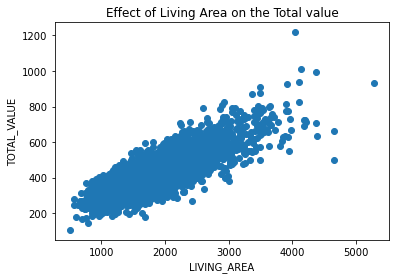

In [50]:
#13# scatter plot of LIVING_AREA vs. TOTAL_VALUE
plt.scatter(ds['LIVING_AREA'],ds['TOTAL_VALUE'])  
plt.xlabel("LIVING_AREA")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of Living Area on the Total value")
plt.show()

In [51]:
#14 Correlation between the attributes
Co = ds.corr()
Co.style.background_gradient(cmap='PuBuGn')

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
TOTAL_VALUE,1.000000,0.546599,-0.121120,0.835988,0.481270,0.637181,0.558398,0.427937,0.348349,0.018769,0.355394
LOT_SQFT,0.546599,1.000000,-0.093364,0.425286,0.073161,0.307301,0.251931,0.200012,0.136127,0.044703,0.181146
YR_BUILT,-0.121120,-0.093364,1.000000,-0.162704,-0.261120,-0.195399,-0.172551,0.122209,0.093139,0.072251,0.129885
LIVING_AREA,0.835988,0.425286,-0.162704,1.000000,0.475937,0.720036,0.637420,0.433040,0.302140,0.083659,0.258057
FLOORS,0.481270,0.073161,-0.261120,0.475937,1.000000,0.434371,0.431600,0.110122,0.315978,-0.114510,0.119288
ROOMS,0.637181,0.307301,-0.195399,0.720036,0.434371,1.000000,0.708364,0.371619,0.284190,0.131141,0.199842
BEDROOMS,0.558398,0.251931,-0.172551,0.637420,0.431600,0.708364,1.000000,0.326258,0.258260,0.086314,0.158844
FULL_BATH,0.427937,0.200012,0.122209,0.433040,0.110122,0.371619,0.326258,1.000000,-0.133011,0.147894,0.134527
HALF_BATH,0.348349,0.136127,0.093139,0.302140,0.315978,0.284190,0.258260,-0.133011,1.000000,-0.019963,0.175953
KITCHEN,0.018769,0.044703,0.072251,0.083659,-0.114510,0.131141,0.086314,0.147894,-0.019963,1.000000,-0.009308


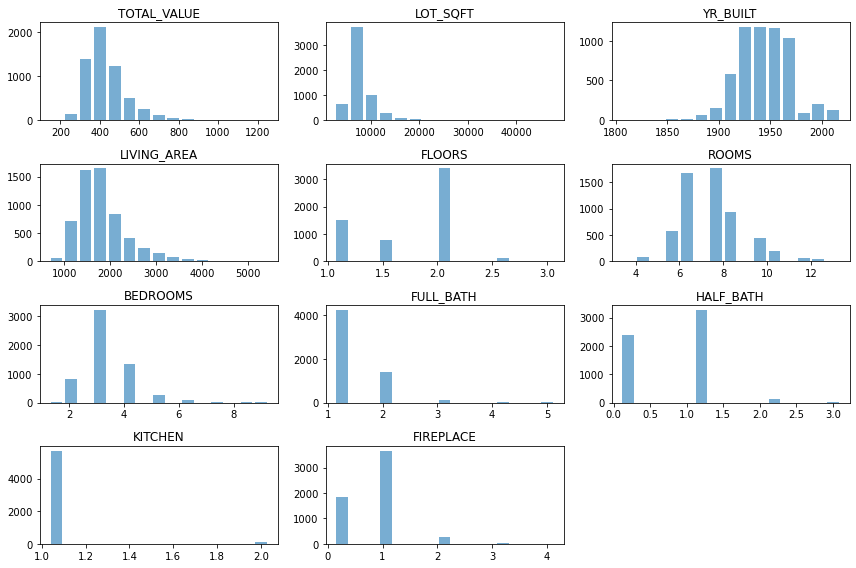

In [52]:
#15 Distribution of all columns
hist = ds.hist(bins=15,figsize=(12, 8),grid = False,rwidth = 0.8,align='right',histtype= 'barstacked',alpha=0.6,)
plt.title('Distribution of all the columns')
plt.tight_layout()

In [53]:
#16 Get summary statistics of the dataset
print(ds.describe())

       TOTAL_VALUE      LOT_SQFT     YR_BUILT  LIVING_AREA       FLOORS  \
count  5793.000000   5793.000000  5793.000000  5793.000000  5793.000000   
mean    392.346801   6275.692387  1937.058174  1655.235629     1.683238   
std      98.844294   2667.863747    25.426573   538.224005     0.445055   
min     105.000000    997.000000  1798.000000   504.000000     1.000000   
25%     325.000000   4770.000000  1920.000000  1306.000000     1.000000   
50%     375.800000   5682.000000  1935.000000  1546.000000     2.000000   
75%     438.400000   7020.000000  1955.000000  1872.000000     2.000000   
max    1217.800000  46411.000000  2011.000000  5289.000000     3.000000   

             ROOMS     BEDROOMS    FULL_BATH    HALF_BATH      KITCHEN  \
count  5793.000000  5793.000000  5793.000000  5793.000000  5793.000000   
mean      6.988434     3.227171     1.294839     0.613326     1.015363   
std       1.423839     0.842074     0.519711     0.533390     0.123004   
min       3.000000     1.000

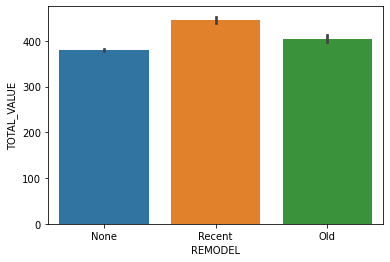

In [54]:
#17 barplot for Remodel
sns.barplot(x="REMODEL", y="TOTAL_VALUE", data=ds)
plt.show()

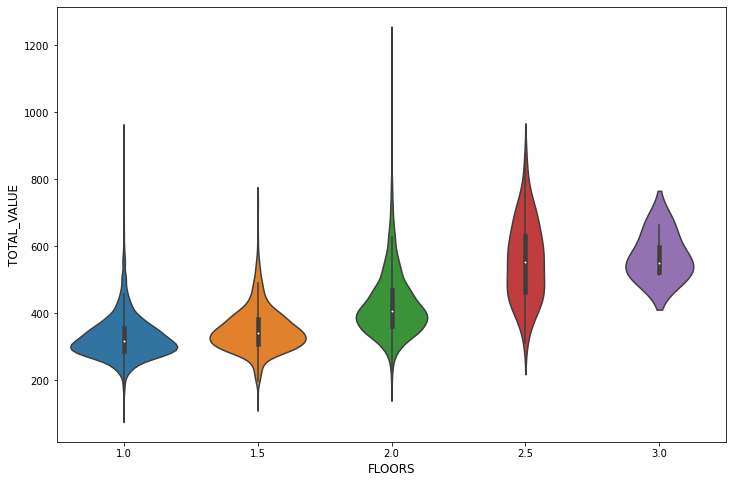

In [55]:
#18
#voilin plot to study the distribution of the data
plt.figure(figsize=(12,8))
sns.violinplot(x='FLOORS', y='TOTAL_VALUE', data=ds)
plt.xlabel('FLOORS', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

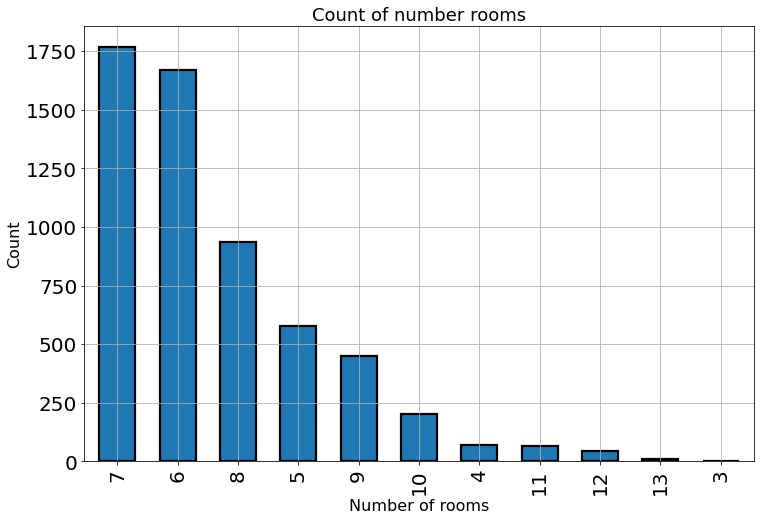

In [56]:
#19 Plot for Rooms
fig, ax=plt.subplots(figsize=(12,8))
ds['ROOMS'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.6,edgecolor='black',align='center',linewidth=2.2)
plt.xlabel('Number of rooms',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Count of number rooms',fontsize=18)
plt.grid()
plt.ioff()

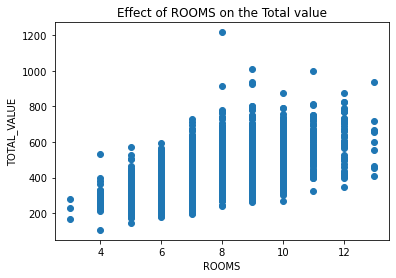

In [57]:
plt.scatter(ds['ROOMS'],ds['TOTAL_VALUE'])  
plt.xlabel("ROOMS")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of ROOMS on the Total value")
plt.show()

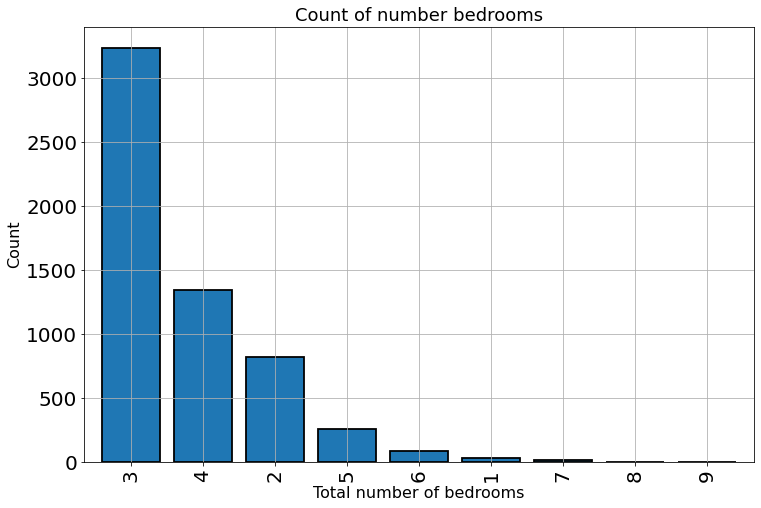

In [58]:
#20 Plot for BedRooms
fig, ax=plt.subplots(figsize=(12,8))
ds['BEDROOMS'].value_counts().sort_values(ascending=False).head(9).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=1.8)
plt.xlabel('Total number of bedrooms',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Count of number bedrooms',fontsize=18)
ax.grid()
plt.ioff()

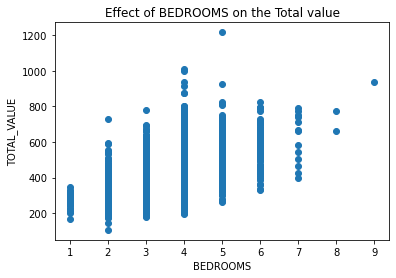

In [59]:
plt.scatter(ds['BEDROOMS'],ds['TOTAL_VALUE'])  
plt.xlabel("BEDROOMS")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of BEDROOMS on the Total value")
plt.show()

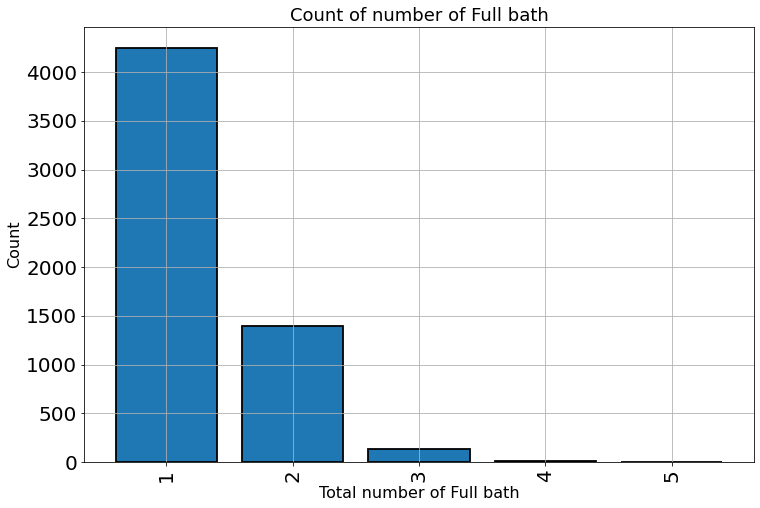

In [60]:
#21 Plot for FULL BATH
fig, ax=plt.subplots(figsize=(12,8))
ds['FULL_BATH'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=1.8)
plt.xlabel('Total number of Full bath',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.tick_params(labelsize=20)
plt.title('Count of number of Full bath',fontsize=18)
ax.grid()
plt.show()

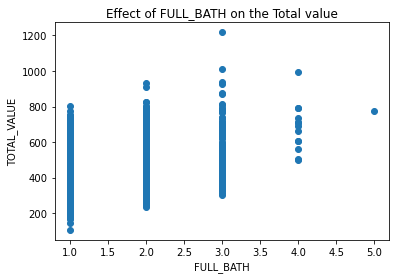

In [61]:
plt.scatter(ds['FULL_BATH'],ds['TOTAL_VALUE'])  
plt.xlabel("FULL_BATH")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of FULL_BATH on the Total value")
plt.show()

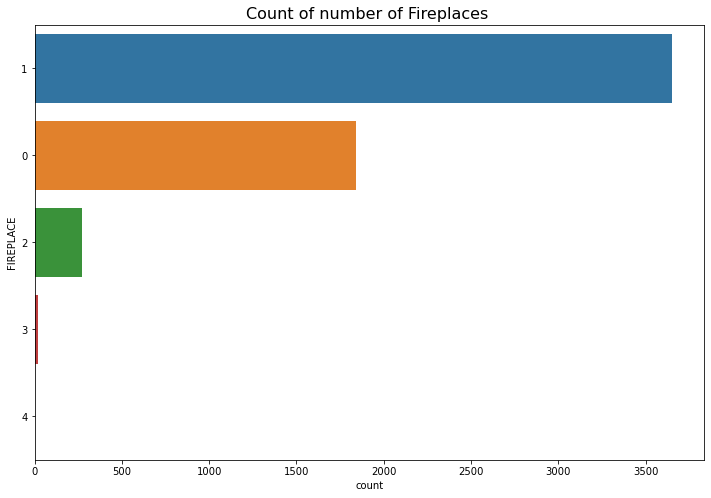

In [62]:
#22 Plot for fireplace
fig = plt.figure(figsize = (12, 8))
sns.countplot(y='FIREPLACE', data=ds, order=ds['FIREPLACE'].value_counts()[0:15].index).set_title("Count of number of Fireplaces ", fontsize = 16)
plt.ioff()

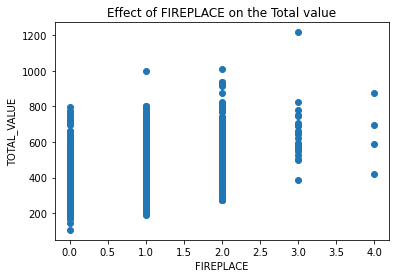

In [63]:
plt.scatter(ds['FIREPLACE'],ds['TOTAL_VALUE'])  
plt.xlabel("FIREPLACE")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of FIREPLACE on the Total value")
plt.show()

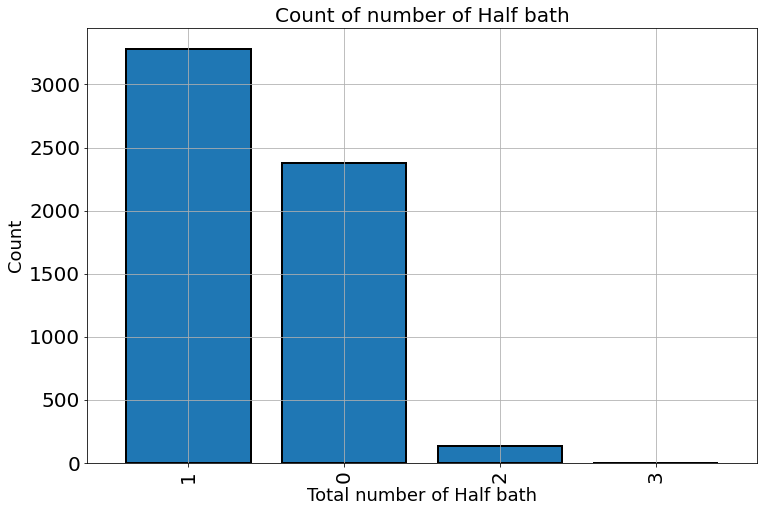

In [64]:
#23 Plot for half bath
fig, ax=plt.subplots(figsize=(12,8))
ds['HALF_BATH'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=2)
plt.xlabel('Total number of Half bath',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Count of number of Half bath',fontsize=20)
ax.tick_params(labelsize=20)
ax.grid()
plt.ioff()

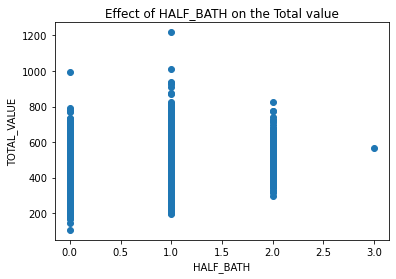

In [65]:
plt.scatter(ds['HALF_BATH'],ds['TOTAL_VALUE'])  
plt.xlabel("HALF_BATH")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of HALF_BATH on the Total value")
plt.show()

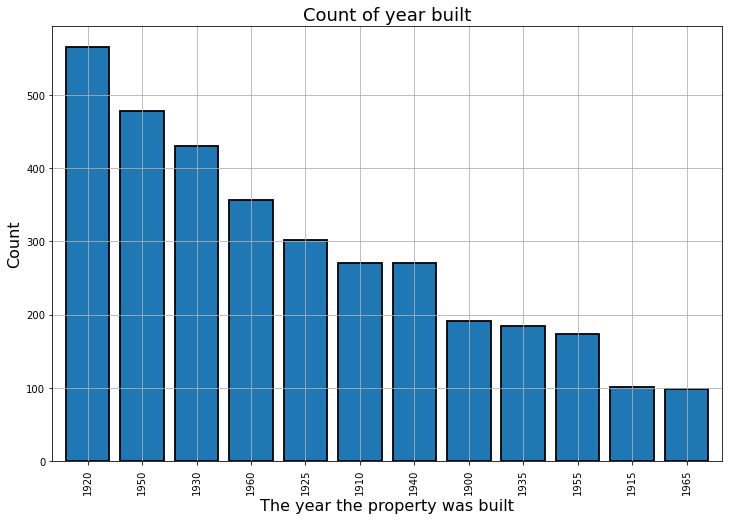

In [66]:
#24 Plot for Year built
fig, ax=plt.subplots(figsize=(12,8))
ds['YR_BUILT'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=1.8)
plt.xlabel('The year the property was built',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Count of year built',fontsize=18)
ax.grid()
plt.ioff()

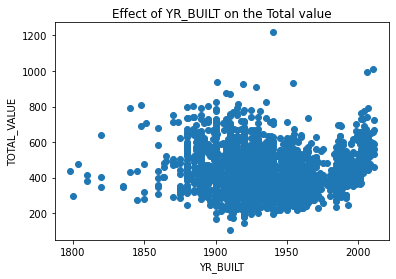

In [67]:
plt.scatter(ds['YR_BUILT'],ds['TOTAL_VALUE'])  
plt.xlabel("YR_BUILT")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of YR_BUILT on the Total value")
plt.show()

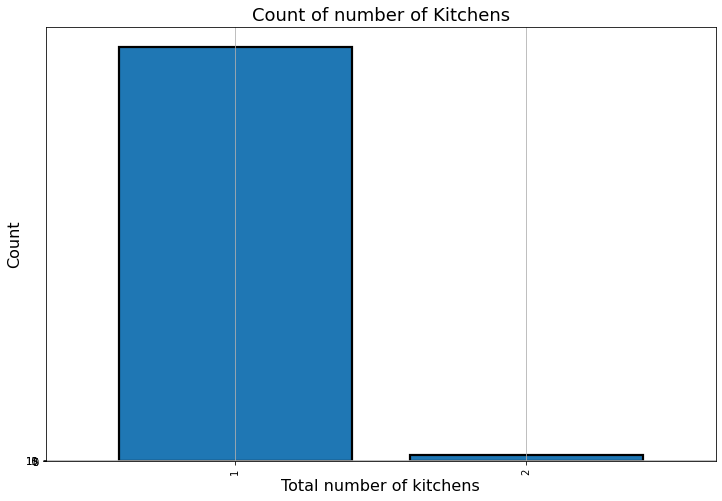

In [68]:
#25 Plot for Kitchen
fig, ax=plt.subplots(figsize=(12,8))
ds['KITCHEN'].value_counts().sort_values(ascending=False).head(2).plot.bar(width=0.8,edgecolor='black',align='center',linewidth=2.2)
plt.xlabel('Total number of kitchens',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.set_yticks([0, 5, 10, 15])
plt.title('Count of number of Kitchens',fontsize=18)
ax.grid()
plt.show()

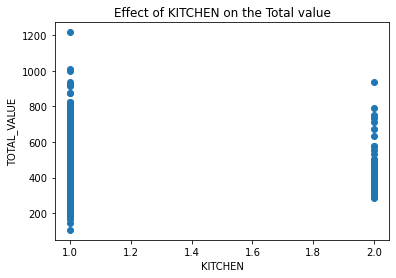

In [69]:
plt.scatter(ds['KITCHEN'],ds['TOTAL_VALUE'])  
plt.xlabel("KITCHEN")                                    
plt.ylabel("TOTAL_VALUE")   
plt.title("Effect of KITCHEN on the Total value")
plt.show()

<AxesSubplot:xlabel='LOT_SQFT'>

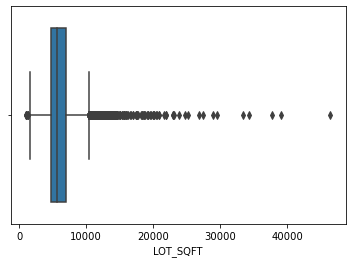

In [70]:
#26 Box plot for Lot size
sns.boxplot(x=ds['LOT_SQFT'])

<AxesSubplot:xlabel='LIVING_AREA', ylabel='Density'>

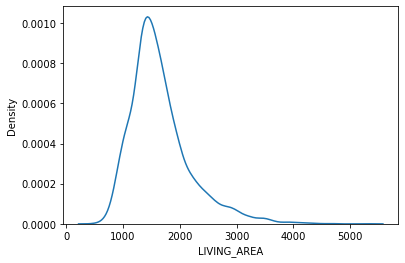

In [71]:
#27 Plot for Living area
sns.kdeplot(ds['LIVING_AREA'])

In [72]:
#28 Encode categorical data
ds = pd.get_dummies(ds,columns=['REMODEL'])


In [73]:
ds = pd.get_dummies(ds, drop_first = True)

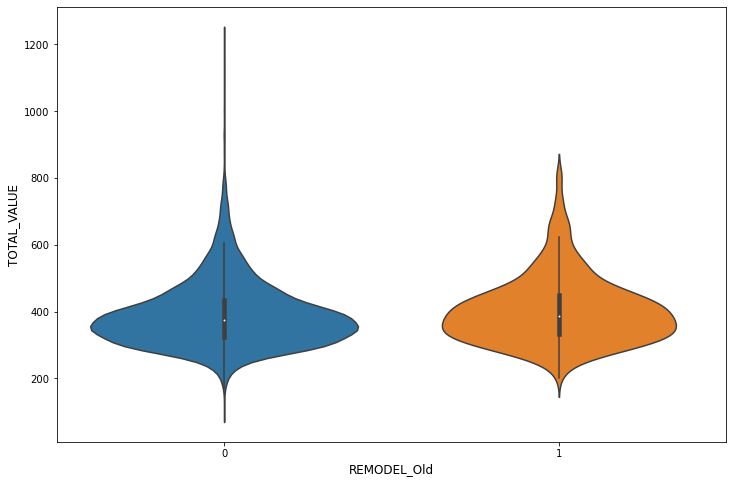

In [74]:
#29 Violin plot after data cleaning
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL_Old',y='TOTAL_VALUE', data=ds)
plt.xlabel('REMODEL_Old', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

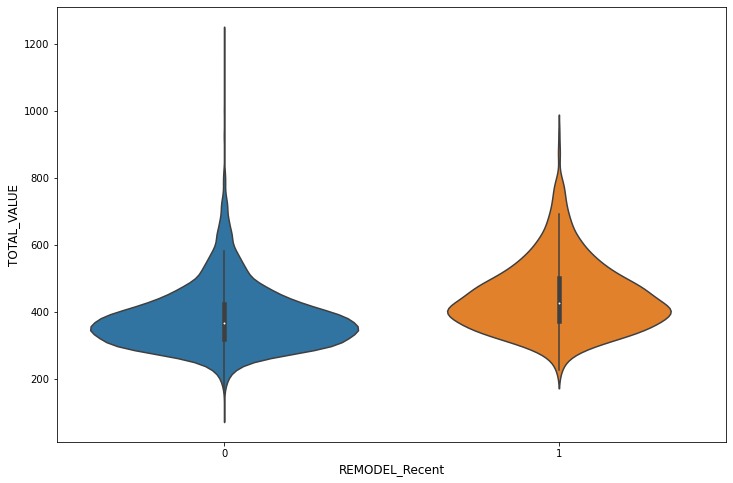

In [75]:
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL_Recent',y='TOTAL_VALUE', data=ds)
plt.xlabel('REMODEL_Recent', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

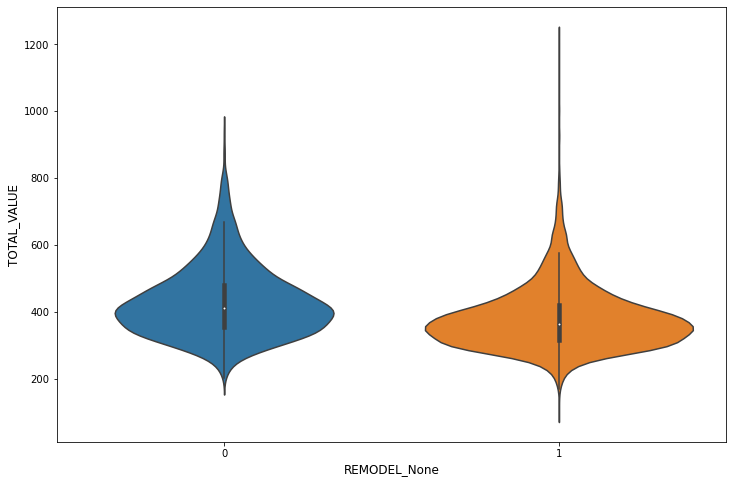

In [76]:
plt.figure(figsize=(12,8))
sns.violinplot(x='REMODEL_None',y='TOTAL_VALUE', data=ds)
plt.xlabel('REMODEL_None', fontsize=12)
plt.ylabel('TOTAL_VALUE', fontsize=12)
plt.show()

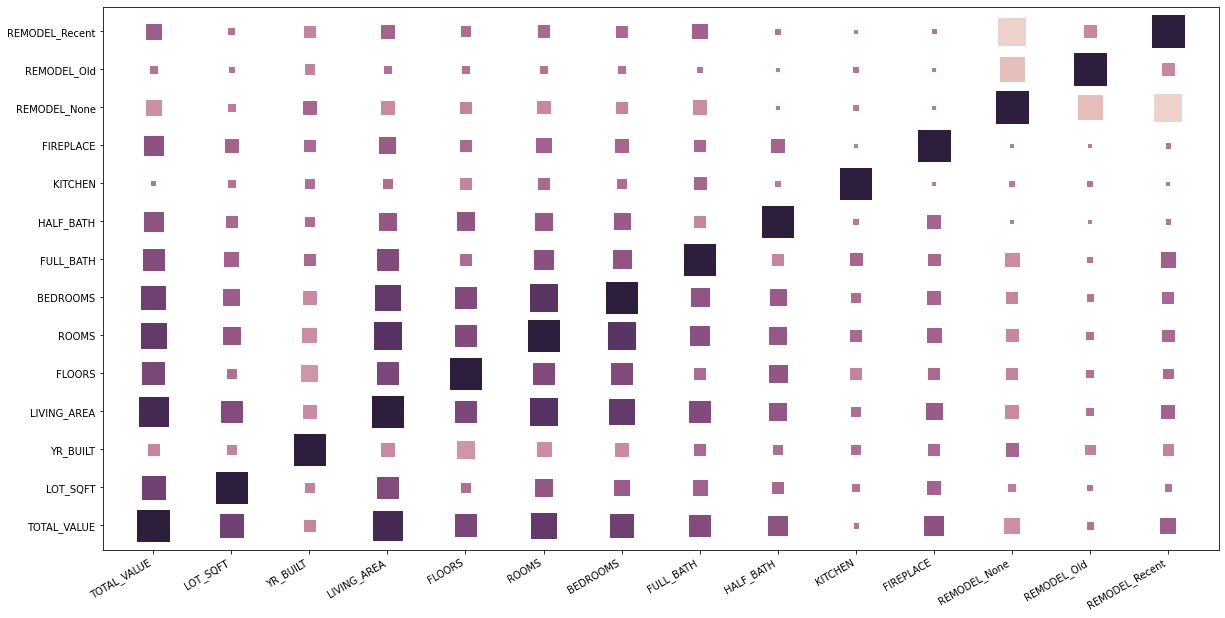

In [77]:
#30 Heat map
def value_to_color(val):
        ind = int((float(val - corr['value'].min()) / (corr['value'].max() - corr['value'].min()))*255)
        return palette[ind]
corr = ds.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
fig, ax = plt.subplots(figsize=(20,10))
n_colors = 256
palette = sns.cubehelix_palette(n_colors) 
color_min, color_max = [-1, 1] 

ax.scatter(
    x = corr['index'].map({p[1]:p[0] for p in enumerate(ds.columns)}),
    y = corr['variable'].map({p[1]:p[0] for p in enumerate(ds.columns)}),
    s = corr['value'].abs() * 1000,
    c = corr['value'].apply(value_to_color), 
    marker='s')
ax.set_xticks([x for x in range(len(ds.columns))])
ax.set_xticklabels(ds.columns, rotation=30, horizontalalignment='right')
ax.set_yticks([x for x in range(len(ds.columns))])
ax.set_yticklabels(ds.columns)
plt.show()